In [1]:
#####notebook for conferece paper COMPARISON OF ELECTROMYOGRAPHIC ACTIVITY OF RECTUS FEMORIS BETWEEN ISOKINETIC KNEE EXTENSION TRAINING AND ROUNDHOUSE KICKS - CASE STUDY
import pandas as pd

In [2]:
###setup NORAXON Ultium IMU units - linear (a) and angular(g) acceleration and EMG data of rectus femoris

In [3]:
###import data for roundhouse kick to a shield
data1 = pd.read_excel("tarczaEMG.xlsx")
data1

,time,ax,ay,az,emg,gx,gy,gz
0,-1.1120,-699.261,-637.368,484.527,1.93461,1.97455,-0.741600,-0.387585
1,-1.1115,-699.261,-643.472,481.841,1.93863,1.98065,-0.796533,-0.393689
2,-1.1110,-699.872,-642.617,488.921,1.95171,1.98675,-0.851466,-0.399792
3,-1.1105,-701.093,-634.804,505.768,1.96479,1.99286,-0.906400,-0.405896
4,-1.1100,-702.313,-626.991,522.615,1.96579,1.99896,-0.961333,-0.412000
...,...,...,...,...,...,...,...,...
25147,11.4615,-848.318,-417.750,544.467,11.12270,-11.59400,-4.477070,-0.045778
25148,11.4620,-840.261,-414.332,527.864,10.87390,-11.22170,-4.275640,-0.015259
25149,11.4625,-832.204,-410.914,511.262,10.61000,-10.84930,-4.074220,0.015259
25150,11.4630,-830.983,-410.914,506.989,10.34310,-10.47700,-3.872800,0.045778


In [4]:
###import data on knee extension on BIODEX
data2 = pd.read_excel("biodexEMG.xlsx")
data2

,time,ax,ay,az,emg,gx,gy,gz
0,-1.5540,-968.809,-116.2180,268.571,3.99820,5.12711,0.427259,-1.1597
1,-1.5535,-968.809,-116.2180,268.571,4.07386,5.12711,0.427259,-1.1597
2,-1.5530,-969.542,-111.5790,279.070,4.10722,5.12711,0.427259,-1.1597
3,-1.5525,-971.007,-102.3010,300.067,4.13454,5.12711,0.427259,-1.1597
4,-1.5520,-972.471,-93.0233,321.065,4.15884,5.12711,0.427259,-1.1597
...,...,...,...,...,...,...,...,...
36675,16.7835,-996.887,-503.0820,165.171,8.65222,57.02080,14.594000,55.4247
36676,16.7840,-1005.190,-515.5340,177.623,8.58864,56.55690,14.972400,55.3087
36677,16.7845,-1013.490,-527.9860,190.075,8.52204,56.09300,15.350800,55.1927
36678,16.7850,-1014.220,-531.1600,199.841,8.44637,55.62910,15.729200,55.0768


In [5]:
###resultant angular velocity for a kick (in mg acceleration unit)
Tx = data1['ax'] **2
Ty = data1['ay'] **2
Tz = data1['az'] **2
Twyp = (Tx + Ty + Tz) ** (1/2)



df_all_cols_wyp = pd.concat([data1['time'], Twyp], axis = 1)
T_wypadkowa = df_all_cols_wyp
T_wypadkowa.columns = ['time', 'a']
T_wypadkowa = T_wypadkowa.iloc[:-1]


In [6]:
##extracting emg data only
emg1 = data1['emg']
emg_wyp = pd.concat([data1['time'], emg1], axis = 1)
emg_wyp = emg_wyp.iloc[:-1]

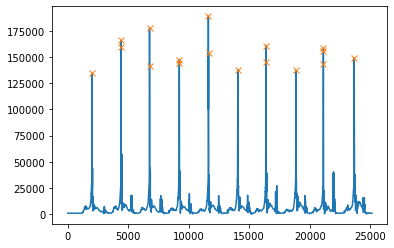

,time,a
2009,-0.1075,134223.007690
4402,1.0890,165693.123403
4413,1.0945,159428.731857
6762,2.2690,177244.324141
6769,2.2725,141100.558372
9218,3.4970,144671.131846
9225,3.5005,147354.734051
11626,4.7010,188774.607620
11638,4.7070,153664.804577
14057,5.9165,137944.708828


In [7]:
##linear acceleration data (raw)
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(T_wypadkowa['a'], height=125000, prominence = 10)

plt.plot(T_wypadkowa['a'])
plt.plot(peaks, T_wypadkowa['a'][peaks], "x")

plt.show()
T =  T_wypadkowa.iloc[peaks,:]
T[["time", "a"]]

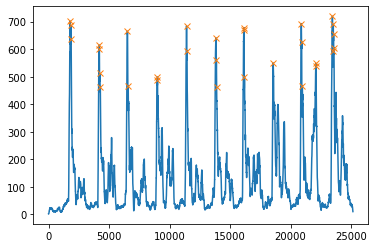

,time,emg
1790,-0.2170,701.888
1839,-0.1925,687.238
1866,-0.1790,638.324
4163,0.9695,601.148
4198,0.9870,614.923
4224,1.0000,511.777
4273,1.0245,464.062
6512,2.1440,665.229
6582,2.1790,465.939
8979,3.3775,486.925


In [8]:
##graph of EMG data for a kick
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(emg_wyp['emg'], height= 450, prominence = 10)

plt.plot(emg_wyp['emg'])
plt.plot(peaks, emg_wyp['emg'][peaks], "x")

plt.show()
T =  emg_wyp.iloc[peaks,:]
T[["time", "emg"]]

In [9]:
##angular velocity of a kick
Tgx = data1['gx'] **2
Tgy = data1['gy'] **2
Tgz = data1['gz'] **2
Tgwyp = (Tgx + Tgy + Tgz) ** (1/2)


df_all_cols_wypg = pd.concat([data1['time'], Tgwyp], axis = 1)
Tg_wypadkowa = df_all_cols_wypg
Tg_wypadkowa.columns = ['time', 'g']
Tg_wypadkowa = Tg_wypadkowa.iloc[:-1]


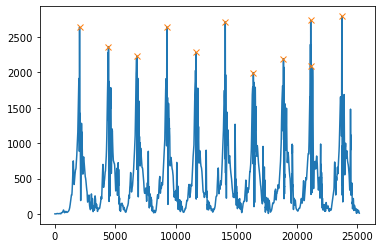

,time,g
2036,-0.0940,2643.219354
4427,1.1015,2364.456479
6786,2.2810,2232.400877
9246,3.5110,2644.209265
11647,4.7115,2281.647306
14077,5.9265,2714.301812
16397,7.0865,1996.182806
18886,8.3310,2194.361178
21137,9.4565,2736.510716
21197,9.4865,2089.704567


In [10]:
##graph for angular velocity of a kick
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(Tg_wypadkowa['g'], height= 1800, prominence = 1800)

plt.plot(Tg_wypadkowa['g'])
plt.plot(peaks, Tg_wypadkowa['g'][peaks], "x")

plt.show()
T =  Tg_wypadkowa.iloc[peaks,:]
T[["time", "g"]]

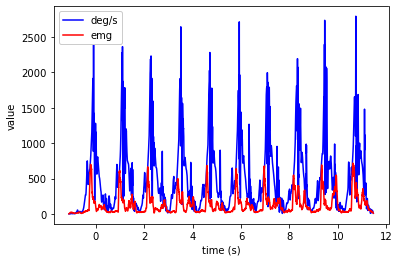

In [11]:
##angular velocity and emg values during kicking
x = T_wypadkowa['time']
y1 = T_wypadkowa['a']
y2 = emg_wyp['emg']
y3 = Tg_wypadkowa['g']

plt.plot(x,y3,'-b', label = 'deg/s')
plt.plot(x,y2,'-r', label = 'emg') 


plt.xlabel('time (s)')
plt.ylabel('value')
plt.legend(framealpha=1, frameon=True);
plt.savefig('wykres_tarczaEMG.png', dpi =300)

plt.show()


In [12]:
## linear acceleration for BIODEX knee extension - resultant acc
T2x = data2['ax'] **2
T2y = data2['ay'] **2
T2z = data2['az'] **2
T2wyp = (T2x + T2y + T2z) ** (1/2)


df_all_cols_2wyp = pd.concat([data2['time'], T2wyp], axis = 1)
T2_wypadkowa = df_all_cols_2wyp
T2_wypadkowa.columns = ['time', 'a']
T2_wypadkowa = T2_wypadkowa.iloc[:-1]

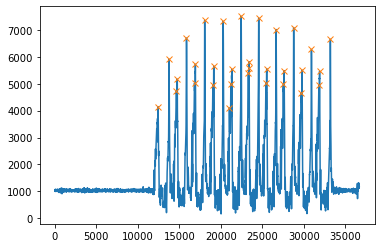

,time,a
12438,4.6650,4144.362598
13753,5.3225,5920.435831
14634,5.7630,4737.999769
14742,5.8170,5173.412590
15854,6.3730,6700.497995
16822,6.8570,5023.411878
16925,6.9085,5726.775379
18046,7.4690,7361.388787
19046,7.9690,4955.943919
19141,8.0165,5660.824713


In [13]:
##graph for BIODEX resultant linear acceleration
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(T2_wypadkowa['a'], height=4000, prominence = 200)

plt.plot(T2_wypadkowa['a'])
plt.plot(peaks, T2_wypadkowa['a'][peaks], "x")

plt.show()
T =  T2_wypadkowa.iloc[peaks,:]
T[["time", "a"]]

In [14]:
###emg data for BIODEX exercise
emg2 = data2['emg']
emg_wyp2 = pd.concat([data2['time'], emg2], axis = 1)
emg_wyp2 = emg_wyp2.iloc[:-1]

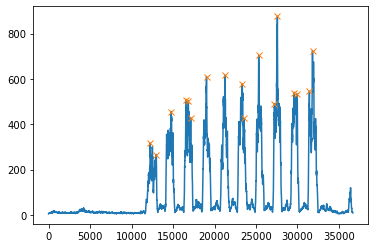

,time,emg
12246,4.5690,317.365
12979,4.9355,266.257
14769,5.8305,455.484
16560,6.7260,508.054
16836,6.8640,503.298
17124,7.0080,428.843
19036,7.9640,610.381
21272,9.0820,616.338
23317,10.1045,578.004
23549,10.2205,427.062


In [15]:
##graph for EMG on BIODEX
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(emg_wyp2['emg'], height= 220, prominence = 150)

plt.plot(emg_wyp2['emg'])
plt.plot(peaks, emg_wyp2['emg'][peaks], "x")

plt.show()
T =  emg_wyp2.iloc[peaks,:]
T[["time", "emg"]]

In [16]:
## resultant angular velocity for BIODEX exercise
T2gx = data2['gx'] **2
T2gy = data2['gy'] **2
T2gz = data2['gz'] **2
T2gwyp = (T2gx + T2gy + T2gz) ** (1/2)


df_all_cols_wypg2 = pd.concat([data2['time'], T2gwyp], axis = 1)
Tg_wypadkowa2 = df_all_cols_wypg2
Tg_wypadkowa2.columns = ['time', 'g']
Tg_wypadkowa2 = Tg_wypadkowa2.iloc[:-1]

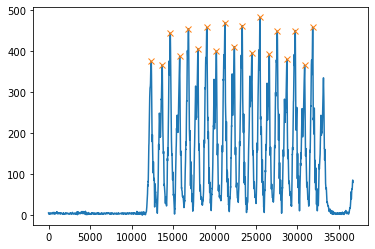

,time,g
12365,4.6285,375.550699
13695,5.2935,366.480391
14665,5.7785,444.480264
15804,6.3480,387.443428
16855,6.8735,454.818640
17994,7.4430,406.498197
19064,7.9780,458.509010
20224,8.5580,400.594072
21245,9.0685,470.004461
22394,9.6430,411.284196


In [17]:
###graph for resultant angular velocity on BIODEX

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(Tg_wypadkowa2['g'], height= 350, prominence = 100)

plt.plot(Tg_wypadkowa2['g'])
plt.plot(peaks, Tg_wypadkowa2['g'][peaks], "x")

plt.show()
T =  Tg_wypadkowa2.iloc[peaks,:]
T[["time", "g"]]

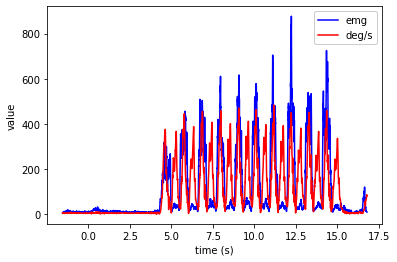

In [18]:
####graphical representation of resultant angular velocity and emg values for BIODEX
x = T2_wypadkowa['time']

y2 = emg_wyp2['emg']
y3 = Tg_wypadkowa2['g']

plt.plot(x,y2,'-b', label = 'emg')
plt.plot(x,y3,'-r', label = 'deg/s') 


plt.xlabel('time (s)')
plt.ylabel('value')
plt.legend(framealpha=1, frameon=True);
plt.savefig('wykres_biodexEMG.png', dpi =300)

plt.show()

In [19]:
Gx = data1['gx']
Gy = data1['gy']
Gz = data1['gz']




df_all_cols_G1 = pd.concat([data1['time'], Gx, Gy, Gz], axis = 1)
wyp_Gx1 = df_all_cols_G1
wyp_Gx1.columns = ['time', 'Gx', 'Gy', 'Gz']
wyp_Gx1 = wyp_Gx1.iloc[:-1]

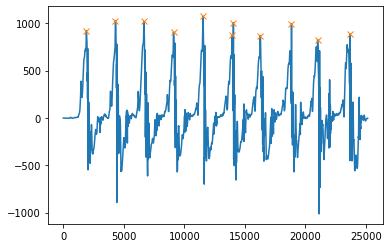

,time,Gy
1907,-0.1585,922.871
4307,1.0415,1026.470
6657,2.2165,1019.950
9107,3.4415,908.713
11546,4.6610,1075.050
13957,5.8665,871.844
14056,5.9160,1006.780
16266,7.0210,869.878
18857,8.3165,993.439
21017,9.3965,827.201


In [20]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(wyp_Gx1['Gy'], height= 800, prominence = 10)

plt.plot(wyp_Gx1['Gy'])
plt.plot(peaks, wyp_Gx1['Gy'][peaks], "x")

plt.show()
T =  wyp_Gx1.iloc[peaks,:]
T[["time", "Gy"]]

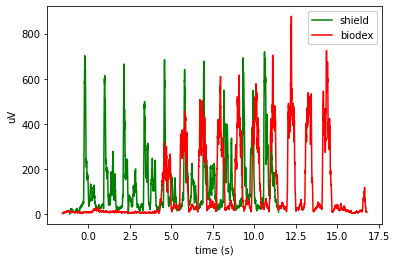

In [36]:
x1 = data1['time']
x2 = data2['time']
y1 = data1['emg']
y2 = data2['emg']

plt.plot(x1,y1,'-g', label = 'shield')
plt.plot(x2,y2,'-r', label = 'biodex')


plt.xlabel('time (s)')
plt.ylabel('uV')
plt.legend(framealpha=1, frameon=True);
plt.savefig('wykres-poster.png', dpi =300)

plt.show()